### Introduction to artificial intelligence

This notebook contains a Script with a implementation of neural network for classification problem.

Author:
    Oscar Hernández Terán
    
Bachelor's Degree:
    Geophysical Engineer

In [1]:
# We import the libraries for EDA.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
plt.style.use('seaborn')

In [2]:
# We import the libraries for IA and ANN.
import keras
import tensorflow as tf

In [3]:
# Load the data.
#fashion_mnist = keras.datasets.fashion_mnist
#(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
#(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
# Information of the data.
print('The shape of the x_train is:', np.shape(X_train_full))
print('The shape of the y_train is:', np.shape(y_train_full))
print('The shape of the x_test is: ', np.shape(X_test))
print('The shape of the y_test is: ', np.shape(y_test))

The shape of the x_train is: (60000, 28, 28)
The shape of the y_train is: (60000,)
The shape of the x_test is:  (10000, 28, 28)
The shape of the y_test is:  (10000,)


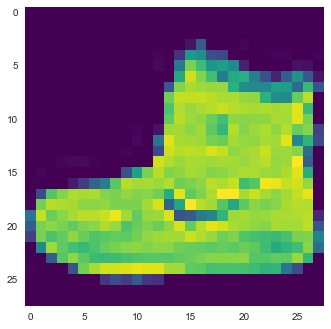

In [5]:
# We print the first matrix.
plt.imshow(X_train_full[0], cmap='viridis')
plt.grid(b=False)

In [6]:
# List of the names of each matrix.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

                Ankle boot


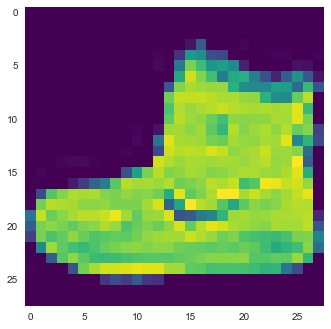

                T-shirt/top


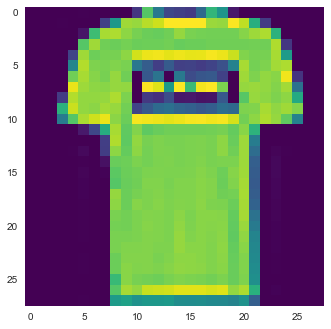

                T-shirt/top


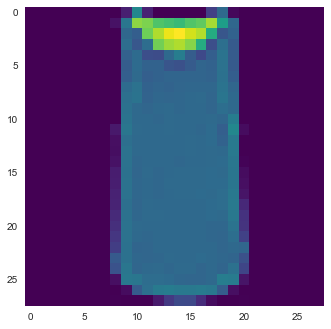

                Dress


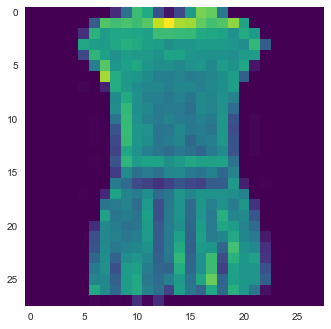

                T-shirt/top


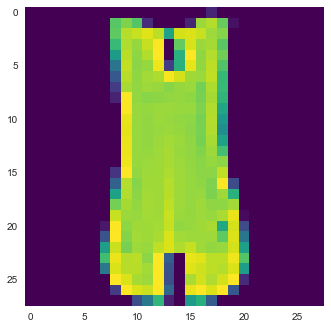

In [7]:
# We check the assignments of each image.
for i in range(5):
    print('               ',class_names[y_train_full[i]])
    plt.imshow(X_train_full[i], cmap='viridis')
    plt.grid(b=False)
    plt.show()

## Data Normalization
For this case, it is important that we normalize the data between 0 and 1.
This is done by dividing all the values by the maximum

In [8]:
X_train_n = X_train_full / 255.0
X_test_n  = X_test  / 255.0

## Split the data into train/validation/test datasets
Training data -> used for trainig the model

Validation data -> used for evaluate the models

Test data -> used for check the model

In [9]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [10]:
print(np.shape(X_valid[0]))
X_valid[0][:20,:5]

(28, 28)


array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.

## Creation of  ANN with Keras

                    SEQUENTIAL MODEL API                    


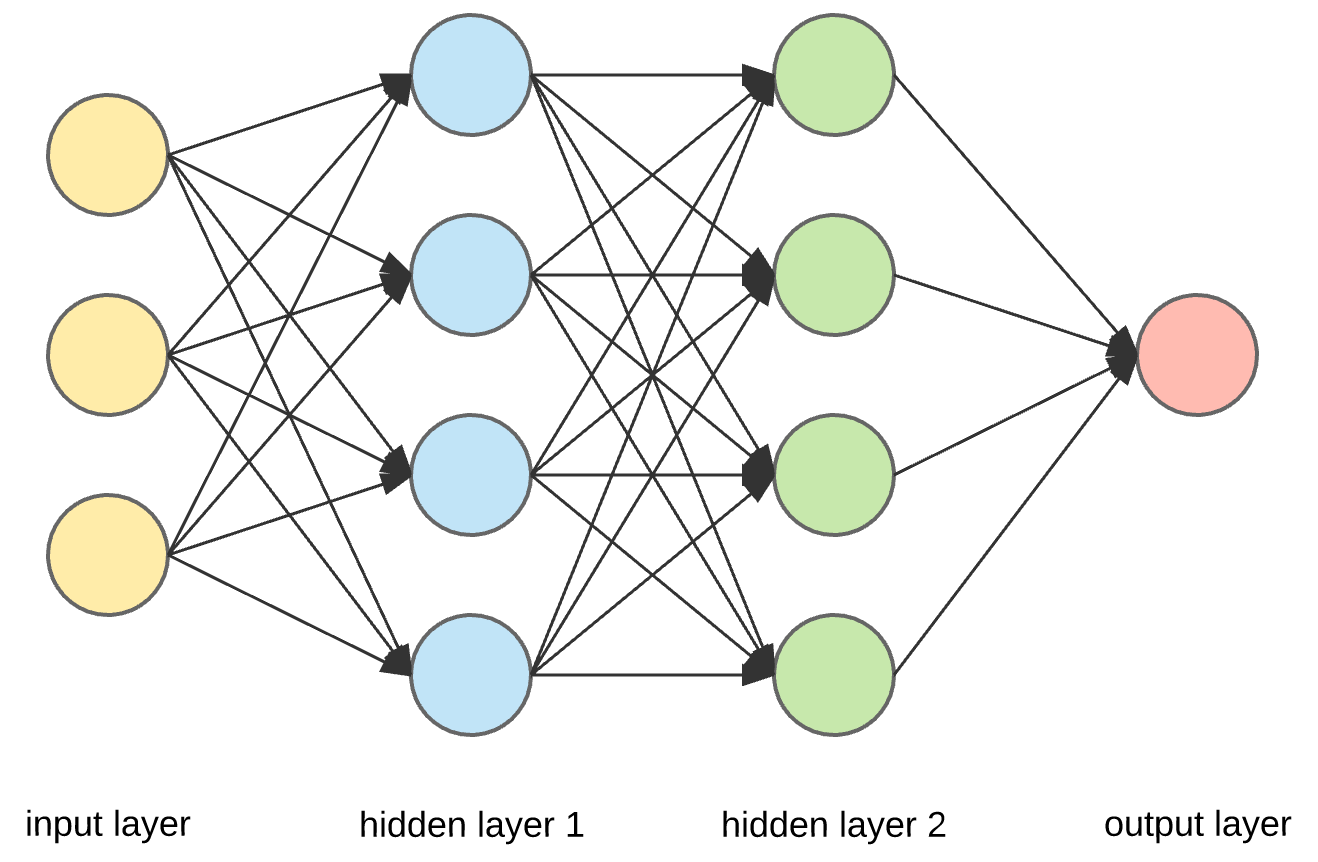

In [11]:
txt = 'SEQUENTIAL MODEL API'
s = txt.center(60)
print(s) 
Image('../Figures/ANN_Seq.png', width=500)

In [12]:
# We inicialized the random seed.
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
# Create the model.
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# 300 is the number of neurons.
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
# If you want, you can add more hidden layers.
# We use function activation 'softmax' because the categories are exclusive.
model.add(keras.layers.Dense(10,  activation='softmax'))

In [14]:
# We check the main features of ANN.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


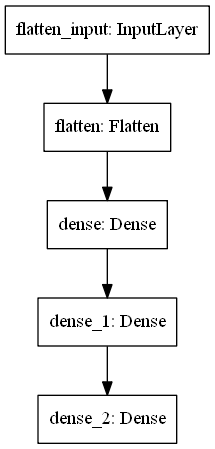

In [15]:
# We chec the intern strucuture of our network.
import pydot
keras.utils.plot_model(model)

In [16]:
weights, baises = model.layers[1].get_weights()
# We check the values of the weights. This values are random.
print(weights)
# Shape of the weights matrix.
weights.shape

[[ 0.02448617 -0.00877795 -0.02189048 ... -0.02766046  0.03859074
  -0.06889391]
 [ 0.00476504 -0.03105379 -0.0586676  ...  0.00602964 -0.02763776
  -0.04165364]
 [-0.06189284 -0.06901957  0.07102345 ... -0.04238207  0.07121518
  -0.07331658]
 ...
 [-0.03048757  0.02155137 -0.05400612 ... -0.00113463  0.00228987
   0.05581069]
 [ 0.07061854 -0.06960931  0.07038955 ... -0.00384101  0.00034875
   0.02878492]
 [-0.06022581  0.01577859 -0.02585464 ... -0.00527829  0.00272203
  -0.06793761]]


(784, 300)

In [17]:
# Check of the baises values. 
print(baises)
baises.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(300,)

In [18]:
# We compile the model with the correct parameters
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [19]:
# We train the model
model_history = model.fit(X_train, y_train, epochs=30,
                          validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7239 - accuracy: 0.7643 - val_loss: 0.5219 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8320 - val_loss: 0.4352 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4389 - accuracy: 0.8456 - val_loss: 0.5350 - val_accuracy: 0.7984
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4121 - accuracy: 0.8563 - val_loss: 0.3919 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3937 - accuracy: 0.8619 - val_loss: 0.3751 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3749 - accuracy: 0.8677 - val_loss: 0.3719 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3631 - accuracy: 0.8711 - val_loss: 0.3622 - val_accuracy:

In [20]:
# We check the parameters of our model
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [21]:
# Hostory of the values
model_history.history

{'loss': [0.7238965630531311,
  0.4841584265232086,
  0.43885383009910583,
  0.4121268391609192,
  0.39366549253463745,
  0.3749418556690216,
  0.3630700409412384,
  0.35156887769699097,
  0.3411632776260376,
  0.3319751024246216,
  0.3240024745464325,
  0.3147030770778656,
  0.30797964334487915,
  0.3019355833530426,
  0.29456961154937744,
  0.2888883650302887,
  0.2839215397834778,
  0.2776336669921875,
  0.272808313369751,
  0.2672886848449707,
  0.26240432262420654,
  0.25757795572280884,
  0.25364652276039124,
  0.24834051728248596,
  0.24411514401435852,
  0.24049851298332214,
  0.23627226054668427,
  0.23259715735912323,
  0.22845612466335297,
  0.22509993612766266],
 'accuracy': [0.7643091082572937,
  0.8320000171661377,
  0.8456000089645386,
  0.8563454747200012,
  0.8619090914726257,
  0.8676727414131165,
  0.8711272478103638,
  0.8746363520622253,
  0.8791999816894531,
  0.8821272850036621,
  0.8838727474212646,
  0.8869272470474243,
  0.8892182111740112,
  0.891563653945922

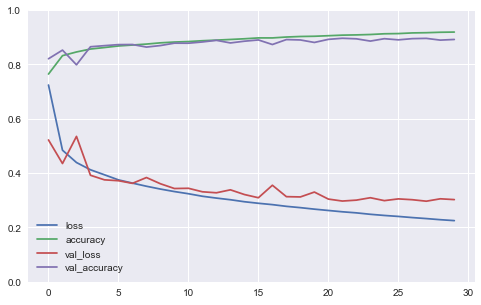

In [22]:
# We plot the values of the ANN
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(b=True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
# Returns the loss value & metrics values for the model in test mode.
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.8820


[0.3362337052822113, 0.8820000290870667]

In [24]:
# We cut 3 values of X_test
X_new = X_test[:3]

In [25]:
# Generates output predictions for the input samples.
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [27]:
# Here check the predictions
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

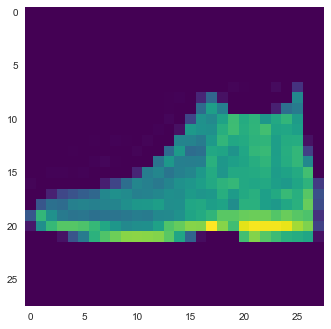

In [28]:
# Plot the matrix for check the prediction
plt.imshow(X_test[0], cmap='viridis')
plt.grid(b=False)

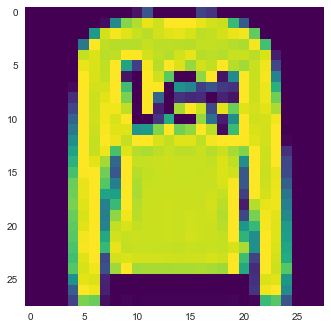

In [29]:
plt.imshow(X_test[1], cmap='viridis')
plt.grid(b=False)

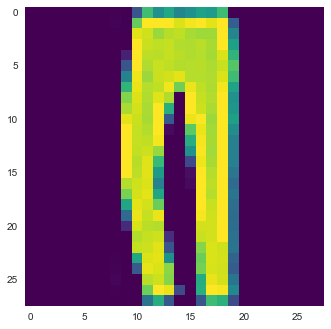

In [30]:
plt.imshow(X_test[2], cmap='viridis')
plt.grid(b=False)